## New York Times Covid-19 data (Github) 

This demonstrates one of the most useful features of `pd.read_csv`.  It can be given
a URl as an argument.

So Published data sets like this one:

**Data from The New York Times, based on reports from state and local health agencies**

are easily accessed. Read about this data set at [the Github site.](https://github.com/nytimes/covid-19-data)



In [19]:
import pandas as pd
from datetime import datetime

def geoid2code(geoid):
    return int(geoid[4:])

# this data set has cumulative stats
nyt_github_covid_cumulative = 'https://raw.githubusercontent.com/nytimes/'\
                        'covid-19-data/master/us-counties.csv'
nyt_github_covid_rolling_avg = 'https://raw.githubusercontent.com/nytimes/'\
                        'covid-19-data/master/rolling-averages/us-counties.csv'
df = pd.read_csv(nyt_github_covid_rolling_avg,converters=dict(geoid=geoid2code))
df.rename(columns={'geoid': 'GEOID'},inplace=True)

start, end = datetime.fromisoformat(df['date'].min()),\
               datetime.fromisoformat(df['date'].max())

In [2]:
type(df['GEOID'].values[0])

numpy.int64

I grew up in Cook County.  It is where Chicago is.

In [3]:
df[df['county']=='Cook']

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
4,2020-01-24,17031,Cook,Illinois,1,0.14,0.00,0,0.00,0.00
6,2020-01-25,17031,Cook,Illinois,0,0.14,0.00,0,0.00,0.00
9,2020-01-26,17031,Cook,Illinois,0,0.14,0.00,0,0.00,0.00
14,2020-01-27,17031,Cook,Illinois,0,0.14,0.00,0,0.00,0.00
19,2020-01-28,17031,Cook,Illinois,0,0.14,0.00,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1770334,2021-09-28,17031,Cook,Illinois,486,748.00,14.52,17,10.29,0.20
1770523,2021-09-28,13075,Cook,Georgia,2,4.00,23.16,0,0.14,0.83
1772856,2021-09-29,27031,Cook,Minnesota,1,0.57,10.46,0,0.00,0.00
1773582,2021-09-29,17031,Cook,Illinois,764,723.00,14.04,4,9.29,0.18


Oops, it looks like there are some other Cook Counties!

In [21]:
df2 = df[(df['county']=='Cook') & (df['state']=='Illinois')]
df2

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
4,2020-01-24,17031,Cook,Illinois,1,0.14,0.00,0,0.00,0.00
6,2020-01-25,17031,Cook,Illinois,0,0.14,0.00,0,0.00,0.00
9,2020-01-26,17031,Cook,Illinois,0,0.14,0.00,0,0.00,0.00
14,2020-01-27,17031,Cook,Illinois,0,0.14,0.00,0,0.00,0.00
19,2020-01-28,17031,Cook,Illinois,0,0.14,0.00,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1760590,2021-09-25,17031,Cook,Illinois,0,865.71,16.81,0,8.86,0.17
1763838,2021-09-26,17031,Cook,Illinois,0,865.71,16.81,0,8.86,0.17
1767086,2021-09-27,17031,Cook,Illinois,1924,786.86,15.28,21,8.57,0.17
1770334,2021-09-28,17031,Cook,Illinois,486,748.00,14.52,17,10.29,0.20


Pittsburgh

In [5]:
cty,state = "Allegheny","Pennsylvania"
this_df = df[(df['county']== cty) & (df['state']==state)]
#counties = df[(df['state']==state)]['county'].values
#set(counties)
this_df

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
2033,2020-03-14,42003,Allegheny,Pennsylvania,1,0.14,0.01,0,0.00,0.00
2417,2020-03-15,42003,Allegheny,Pennsylvania,2,0.43,0.04,0,0.00,0.00
2857,2020-03-16,42003,Allegheny,Pennsylvania,2,0.71,0.06,0,0.00,0.00
3350,2020-03-17,42003,Allegheny,Pennsylvania,5,1.43,0.12,0,0.00,0.00
3920,2020-03-18,42003,Allegheny,Pennsylvania,2,1.71,0.14,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1758943,2021-09-25,42003,Allegheny,Pennsylvania,389,379.00,31.17,5,3.00,0.25
1762191,2021-09-26,42003,Allegheny,Pennsylvania,332,372.57,30.64,0,2.86,0.23
1765439,2021-09-27,42003,Allegheny,Pennsylvania,308,376.71,30.98,0,2.86,0.23
1768687,2021-09-28,42003,Allegheny,Pennsylvania,436,372.57,30.64,11,3.71,0.31


### Six cities

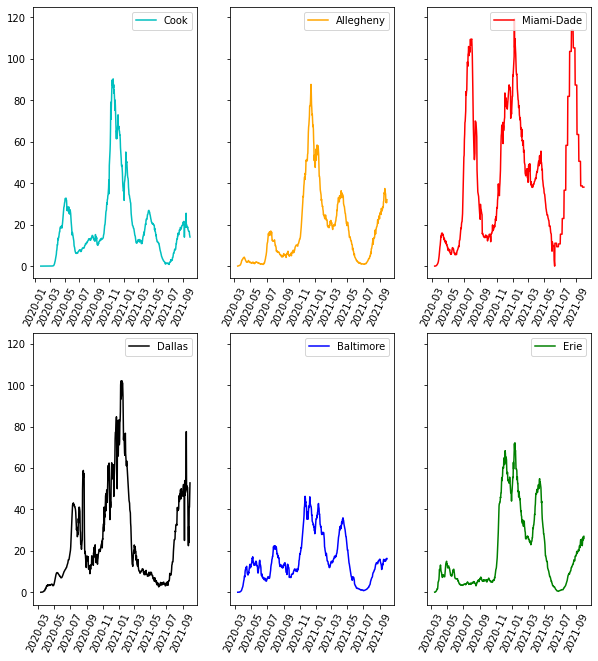

In [6]:
import numpy as np
import matplotlib.pylab as plt
import datetime

counties = np.array([[('Cook','Illinois'),
                      ('Allegheny','Pennsylvania'),
                     ('Miami-Dade','Florida')],
                      [('Dallas','Texas'),
                       ('Baltimore','Maryland'),
                        ('Erie',"New York")  
                      ]]
                   )
colors = np.array([['c','orange','red'],
                       ['k','b', 'g']])  

def plot_counties_data (counties,color=colors,figsize=(10,11),
                        data_col='cases_avg'):
    rows,cols,atts = counties.shape
    # Nite we are sharing y axis among the plots
    fig, axes = plt.subplots(rows,cols,sharey=True,figsize=figsize)
    if axes.ndim == 1:
        # make sure this is a 2D array
        axes = axes[np.newaxis,:]
    for r in range(rows):
        for c in range(cols):
            cty,state = counties[r,c]
            this_df = df[(df['county']== cty) & (df['state']==state)]
            times = np.array([datetime.date.fromisoformat(d) 
                              for d in this_df.date])
            plt.axes(axes[r,c])
            l, = plt.plot(times,this_df[data_col], label=cty)
            l.set_color(colors[r,c])
            plt.xticks(rotation=65)
            plt.legend()

plot_counties_data(counties,data_col='cases_avg_per_100k')

Validating the display vals for Cook county

In [23]:
inc

datetime.timedelta(days=61, seconds=60480)

In [24]:
xvals2

[datetime.date(2020, 1, 24),
 datetime.date(2020, 1, 25),
 datetime.date(2020, 1, 26),
 datetime.date(2020, 1, 27),
 datetime.date(2020, 1, 28),
 datetime.date(2020, 1, 29),
 datetime.date(2020, 1, 30),
 datetime.date(2020, 1, 31),
 datetime.date(2020, 2, 1),
 datetime.date(2020, 2, 2),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 5),
 datetime.date(2020, 2, 6),
 datetime.date(2020, 2, 7),
 datetime.date(2020, 2, 8),
 datetime.date(2020, 2, 9),
 datetime.date(2020, 2, 10),
 datetime.date(2020, 2, 11),
 datetime.date(2020, 2, 12),
 datetime.date(2020, 2, 13),
 datetime.date(2020, 2, 14),
 datetime.date(2020, 2, 15),
 datetime.date(2020, 2, 16),
 datetime.date(2020, 2, 17),
 datetime.date(2020, 2, 18),
 datetime.date(2020, 2, 19),
 datetime.date(2020, 2, 20),
 datetime.date(2020, 2, 21),
 datetime.date(2020, 2, 22),
 datetime.date(2020, 2, 23),
 datetime.date(2020, 2, 24),
 datetime.date(2020, 2, 25),
 datetime.date(2020, 2, 26),
 datetime.date(2020, 2,

In [72]:
import datetime
num_ticks = 10
inc = (end-start)/num_ticks
xvals2 = [datetime.date.fromisoformat(dt) for dt in df2.date]
xticks = [start + (i*inc) for i in range(num_ticks)]
# We're done doing date arithmetic, now strings
xticklabels = [xt.date().isoformat() for xt in xticks]
f = lambda d: df2[df2['date'] == d]['cases'].values/1e6
vals = [(i,f(d)[0]) for (i,d) in enumerate(xticklabels) if len(f(d)) > 0]
for (i,v) in  vals:
    print(f'{xticklabels[i]} {v:5.3f}')

2020-03-22 0.000
2020-05-23 0.001
2020-07-24 0.001
2020-09-23 0.001
2020-11-24 0.003
2021-01-25 0.001
2021-03-27 0.001
2021-05-28 0.000
2021-07-29 0.000


Using some of the code above for a simple display of `df2`.

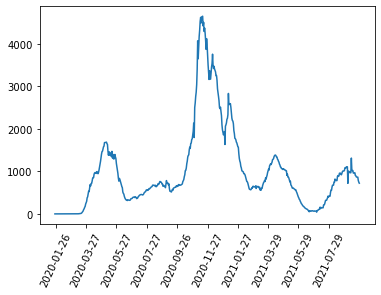

In [177]:
plt.plot(xvals2,df2.cases_avg)
ax = plt.gca()
ax.set_xticks(xticklabels)
val = plt.xticks(rotation=65)

### Some big cities

With shared y-axis, it's helpful to display the big cities
separate from the others.

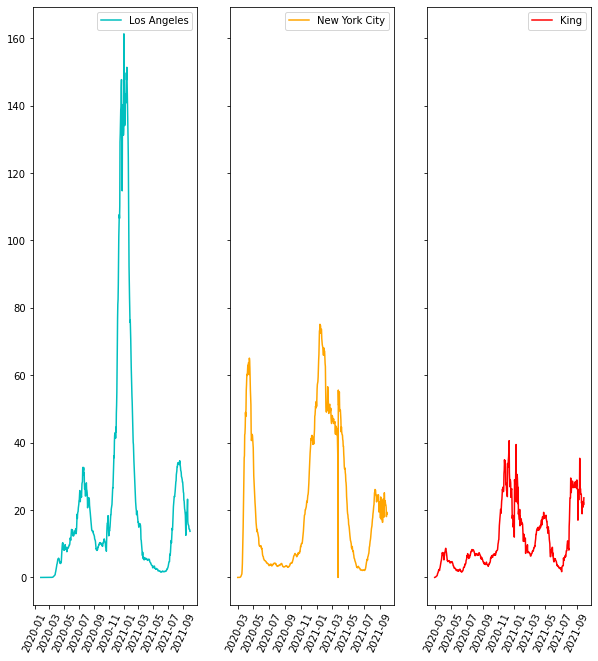

In [5]:
colors2 = colors[1,:][np.newaxis,:]
counties2 = np.array([[('Los Angeles','California'),
             ('New York City','New York'),
            ('King','Washington')]])
plot_counties_data (counties2,data_col='cases_avg_per_100k')

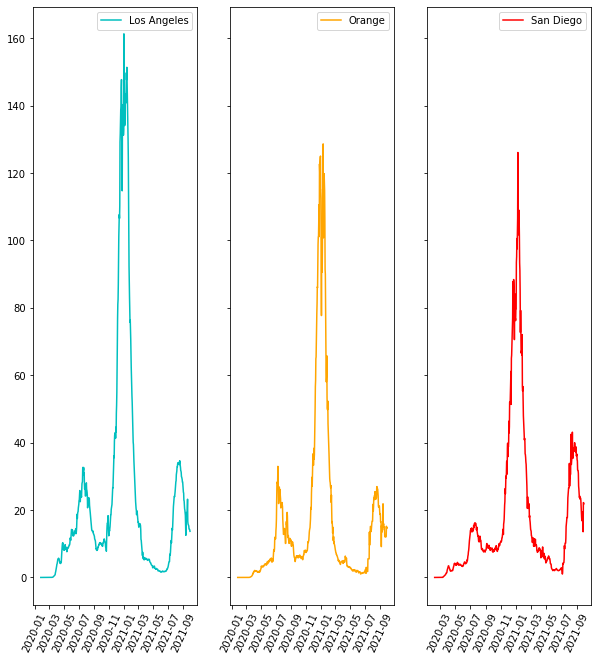

In [73]:
colors2 = colors[1,:][np.newaxis,:]
counties2 = np.array([[('Los Angeles','California'),
                       ('Orange','California'),
                       ('San Diego','California')]])
plot_counties_data (counties2,data_col='cases_avg_per_100k')

### New York City

The NYT data collapses NYC into asingle entry but that';s completely
incompatible with the other other info sources.  Here's what we want.

```
{('Bronx', 'New York'),
 ('Kings', 'New York'),
 ('Lake Ontario', 'New York'),
 ('New York', 'New York'),
 ('Queens', 'New York'),
 ('Richmond', 'New York')}
```

Instead the NYT Covid data has one number combining all teh counts

In [193]:
df[(df['county']=='New York City') & (df['state']=='New York')]

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
406,2020-03-01,36998,New York City,New York,1,0.14,0.00,0,0.00,0.00
434,2020-03-02,36998,New York City,New York,0,0.14,0.00,0,0.00,0.00
468,2020-03-03,36998,New York City,New York,1,0.29,0.00,0,0.00,0.00
505,2020-03-04,36998,New York City,New York,0,0.29,0.00,0,0.00,0.00
546,2020-03-05,36998,New York City,New York,2,0.57,0.01,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1759302,2021-09-25,36998,New York City,New York,0,1786.86,21.43,0,14.00,0.17
1762550,2021-09-26,36998,New York City,New York,3825,1732.71,20.78,30,16.29,0.20
1765798,2021-09-27,36998,New York City,New York,0,1505.00,18.05,0,16.00,0.19
1769046,2021-09-28,36998,New York City,New York,2527,1620.29,19.44,22,15.14,0.18


### Using Seaborn

I found it easy to use seaborn for the eays case, and difficult
to extend it to the multiplot case.  This was because I found it 
hard to tweak the date display on the x-axis when it was a multiple plot.

Your mileage may vary.

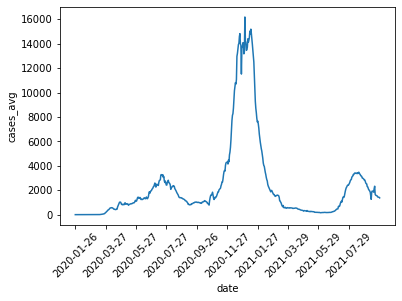

In [45]:
g = sns.lineplot(x='date', y='cases_avg', data=df_toplot)
g.set_xticks(xticklabels)
xts = plt.xticks(rotation=45)

### Adding Lat Longs to the data

The Geographical info is stored in a column named GEOID (we uppercased the name
on loading, for reasons that will become clear below).

In [86]:
df[:5]

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,53061,Snohomish,Washington,1,0.14,0.02,0,0.0,0.0
1,2020-01-22,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
2,2020-01-23,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
3,2020-01-24,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
4,2020-01-24,17031,Cook,Illinois,1,0.14,0.00,0,0.0,0.0


The GEOID column contains FIPS geographical codes that we can use to make maps
from the the data.

Problem is the programs we will use for that purpose want 
lat/long coordinates.

Solution: we got to the census.gov site and get mappings from geocodes
to lat/longs.  We turn this new data into a pandas DataFrame.  We then join
the new DataFrame to our old one.

In [77]:

#Normally you'd get this data here from a compressed file.
true_url = 'https://www2.census.gov/geo/docs/maps-data/data/gazetteer/2021_Gazetteer/'\
      '2021_Gaz_counties_national.zip'
# To simplify things Ive copied it here, uncompressed,
url = 'https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static/'\
      '2021_Gaz_counties_national.txt'
# The file uses tabs, not "," as a separator.  `pd.read_csv` still works if you 
# tell it that.
codes = pd.read_csv(url,sep='\t')
# last column name misparsed, many spaces added.  data cleanup
long = codes.columns[-1]
codes.rename(columns={long: long.strip()},inplace=True)
#Make the subtable we're going to join to.
geoid_lat_long = codes[['GEOID','INTPTLAT','INTPTLONG']]
new_df = df.join(geoid_lat_long.set_index('GEOID'),on='GEOID')
new_df.dropna(inplace=True)

In [7]:
codes[:5]

,USPS,GEOID,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,1001,161526,Autauga County,1539634184,25674812,594.456,9.913,32.532237,-86.646440
1,AL,1003,161527,Baldwin County,4117656514,1132955729,1589.836,437.437,30.659218,-87.746067
2,AL,1005,161528,Barbour County,2292160149,50523213,885.008,19.507,31.870253,-85.405104
3,AL,1007,161529,Bibb County,1612188717,9572303,622.470,3.696,33.015893,-87.127148
4,AL,1009,161530,Blount County,1670259090,14860281,644.891,5.738,33.977358,-86.566440


### the problem of NYC

Two solutions were implemented in the original NB.

We run the code for both here without reproducing the discussion there.

In [88]:
county,st = 'Bronx County','NY'
burrough_geoid = codes[(codes['NAME'] == county) &
                        (codes['USPS'] == 'NY')]['GEOID'].values[0]
nyc_geoid = 36998

def get_cty_geoid (county,st):
    return codes[(codes['NAME'] == county) &
                        (codes['USPS'] == 'NY')]['GEOID'].values[0]

def add_interpolate_cty_info (df, county_list, base_cty_geoid, st):
    """
    Create data frame copy for only the  NYC data.
    Rename County/geoid  to be burrough, burrough_geoid  
    Adjoin to `df` with `pd.concat`.
    Known bug: arguable interpolation for "average" cols; 
    false for cumulative/cases cols.
    """
    df_list = [df]
    for county in county_list:
        sub_df = df[df['GEOID']==base_cty_geoid].copy()
        sub_df.loc[sub_df['GEOID']== base_cty_geoid,'county'] = county
        # Gotta do this update last, since GEOID is our hook for doing updates
        burrough_geoid = get_cty_geoid (county,st)
        sub_df.loc[sub_df['GEOID'] == base_cty_geoid,'GEOID'] = burrough_geoid
        df_list.append(sub_df)
    df_plus_interps = pd.concat(df_list,ignore_index=True)
    return df_plus_interps 
 
# Interpolate!
df_plus_interps = add_interpolate_cty_info (df, cty_list, nyc_geoid, st=st)

# Check by county name
df_plus_interps[df_plus_interps['county']==county]
# Check by burrough_geoid
#df_plus_interps[df_plus_interps['GEOID']==burrough_geoid]

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
1774782,2020-03-01,36005,Bronx County,New York,1,0.14,0.00,0,0.00,0.00
1774783,2020-03-02,36005,Bronx County,New York,0,0.14,0.00,0,0.00,0.00
1774784,2020-03-03,36005,Bronx County,New York,1,0.29,0.00,0,0.00,0.00
1774785,2020-03-04,36005,Bronx County,New York,0,0.29,0.00,0,0.00,0.00
1774786,2020-03-05,36005,Bronx County,New York,2,0.57,0.01,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1775355,2021-09-25,36005,Bronx County,New York,0,1786.86,21.43,0,14.00,0.17
1775356,2021-09-26,36005,Bronx County,New York,3825,1732.71,20.78,30,16.29,0.20
1775357,2021-09-27,36005,Bronx County,New York,0,1505.00,18.05,0,16.00,0.19
1775358,2021-09-28,36005,Bronx County,New York,2527,1620.29,19.44,22,15.14,0.18


The second fix must wait until the lat long cols have been added by joining.

We define the function here and execute it below.

In [83]:
st = 'NY'
cty = 'New York County'
nyc_geoid = 36998
 
def add_missing_lat_longs (df, nyc_geoid):
    ## Call this
    ## add_missing_lat_longs (new_df, nyc_geoid)
    sub_codes_df = codes[codes['GEOID'] == nyc_geoid]
    lat_val = sub_codes_df['INTPTLAT'].values[0]
    long_val = sub_codes_df['INTPTLONG'].values[0]
    df.loc[df['GEOID']==nyc_geoid,'INTPTLAT'] = lat_val
    df.loc[df['GEOID']==nyc_geoid,'INTPTLONG'] = long_val
 
#lat_val = codes[(codes['NAME'] == cty) &(codes['USPS']==st)]['INTPTLAT'].values[0]
#long_val = codes[(codes['NAME'] == cty) &(codes['USPS']==st)]['INTPTLONG'].values[0]#,'INTPTLONG']]

# From 
# https://stackoverflow.com/questions/49161120/\
#    pandas-python-set-value-of-one-column-based-on-value-in-another-column
#Method 1: df['c1'].loc[df['c1'] == 'Value'] = 10
# or:
#Method 2: df.loc[df['c1'] == 'Value', 'c1'] = 10

# Method1 Infamous SettingWithCopyWarning generated.  But it seems to work!
#new_df['INTPTLAT'].loc[new_df['GEOID']==nyc_geoid] = lat_val
#new_df['INTPTLONG'].loc[new_df['GEOID']==nyc_geoid] = long_val

# Method 2 No warning!  Works!
#new_df.loc[new_df['GEOID']==nyc_geoid,'INTPTLAT'] = lat_val
#new_df.loc[new_df['GEOID']==nyc_geoid,'INTPTLONG'] = long_val

#new_df.loc[new_df['GEOID']==nyc_geoid]


,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,INTPTLAT,INTPTLONG
406,2020-03-01,36998,New York City,New York,1,0.14,0.00,0,0.00,0.00,40.776642,-73.970187
434,2020-03-02,36998,New York City,New York,0,0.14,0.00,0,0.00,0.00,40.776642,-73.970187
468,2020-03-03,36998,New York City,New York,1,0.29,0.00,0,0.00,0.00,40.776642,-73.970187
505,2020-03-04,36998,New York City,New York,0,0.29,0.00,0,0.00,0.00,40.776642,-73.970187
546,2020-03-05,36998,New York City,New York,2,0.57,0.01,0,0.00,0.00,40.776642,-73.970187
...,...,...,...,...,...,...,...,...,...,...,...,...
1759302,2021-09-25,36998,New York City,New York,0,1786.86,21.43,0,14.00,0.17,40.776642,-73.970187
1762550,2021-09-26,36998,New York City,New York,3825,1732.71,20.78,30,16.29,0.20,40.776642,-73.970187
1765798,2021-09-27,36998,New York City,New York,0,1505.00,18.05,0,16.00,0.19,40.776642,-73.970187
1769046,2021-09-28,36998,New York City,New York,2527,1620.29,19.44,22,15.14,0.18,40.776642,-73.970187


### End NYC Discussion

## Doing the join

In [10]:
#geoid_lat_long = codes[['GEOID','INTPTLAT','INTPTLONG']]
geoid_lat_long[:5]

,GEOID,INTPTLAT,INTPTLONG
0,1001,32.532237,-86.646440
1,1003,30.659218,-87.746067
2,1005,31.870253,-85.405104
3,1007,33.015893,-87.127148
4,1009,33.977358,-86.566440


In [11]:
geoid_lat_long.set_index('GEOID')[:5]

,INTPTLAT,INTPTLONG
GEOID,,
1001,32.532237,-86.646440
1003,30.659218,-87.746067
1005,31.870253,-85.405104
1007,33.015893,-87.127148
1009,33.977358,-86.566440


In [19]:
df[:5]

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,53061,Snohomish,Washington,1,0.14,0.02,0,0.0,0.0
1,2020-01-22,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
2,2020-01-23,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
3,2020-01-24,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
4,2020-01-24,17031,Cook,Illinois,1,0.14,0.00,0,0.0,0.0


In [98]:
#new_df = df.join(geoid_lat_long.set_index('GEOID'),on='GEOID')
new_df = df_plus_interps.join(geoid_lat_long.set_index('GEOID'),on='GEOID')

In [90]:
new_df

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,INTPTLAT,INTPTLONG
0,2020-01-21,53061,Snohomish,Washington,1,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
1,2020-01-22,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
2,2020-01-23,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
3,2020-01-24,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
4,2020-01-24,17031,Cook,Illinois,1,0.14,0.00,0,0.00,0.00,41.894294,-87.645455
...,...,...,...,...,...,...,...,...,...,...,...,...
1777089,2021-09-25,36061,New York County,New York,0,1786.86,21.43,0,14.00,0.17,40.776642,-73.970187
1777090,2021-09-26,36061,New York County,New York,3825,1732.71,20.78,30,16.29,0.20,40.776642,-73.970187
1777091,2021-09-27,36061,New York County,New York,0,1505.00,18.05,0,16.00,0.19,40.776642,-73.970187
1777092,2021-09-28,36061,New York County,New York,2527,1620.29,19.44,22,15.14,0.18,40.776642,-73.970187


In [92]:
codes

,USPS,GEOID,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,1001,161526,Autauga County,1539634184,25674812,594.456,9.913,32.532237,-86.646440
1,AL,1003,161527,Baldwin County,4117656514,1132955729,1589.836,437.437,30.659218,-87.746067
2,AL,1005,161528,Barbour County,2292160149,50523213,885.008,19.507,31.870253,-85.405104
3,AL,1007,161529,Bibb County,1612188717,9572303,622.470,3.696,33.015893,-87.127148
4,AL,1009,161530,Blount County,1670259090,14860281,644.891,5.738,33.977358,-86.566440
...,...,...,...,...,...,...,...,...,...,...
3216,PR,72145,1804553,Vega Baja Municipio,118746309,57826361,45.848,22.327,18.455128,-66.397883
3217,PR,72147,1804554,Vieques Municipio,131541389,552192821,50.788,213.203,18.125418,-65.432474
3218,PR,72149,1804555,Villalba Municipio,92298569,3622640,35.637,1.399,18.130718,-66.472244
3219,PR,72151,1804556,Yabucoa Municipio,143005188,72592515,55.215,28.028,18.059858,-65.859871


In [94]:
st,state = 'NY','New York'
cty = 'New York County'
nyc_geoid = 36998
 
def add_missing_lat_longs (df, county,state,nyc_geoid):
    ## Call this
    ## add_missing_lat_longs (new_df, nyc_geoid)
    #sub_codes_df = codes[codes['GEOID'] == nyc_geoid]
    sub_codes_df = codes[(codes['NAME'] == county)&(codes['USPS'] == st)]
    lat_val = sub_codes_df['INTPTLAT'].values[0]
    long_val = sub_codes_df['INTPTLONG'].values[0]
    df.loc[df['GEOID']==nyc_geoid,'INTPTLAT'] = lat_val
    df.loc[df['GEOID']==nyc_geoid,'INTPTLONG'] = long_val

add_missing_lat_longs (new_df, cty, st,nyc_geoid)
new_df[(new_df['county']== cty) & (new_df['state']==state)]

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,INTPTLAT,INTPTLONG
1776516,2020-03-01,36061,New York County,New York,1,0.14,0.00,0,0.00,0.00,40.776642,-73.970187
1776517,2020-03-02,36061,New York County,New York,0,0.14,0.00,0,0.00,0.00,40.776642,-73.970187
1776518,2020-03-03,36061,New York County,New York,1,0.29,0.00,0,0.00,0.00,40.776642,-73.970187
1776519,2020-03-04,36061,New York County,New York,0,0.29,0.00,0,0.00,0.00,40.776642,-73.970187
1776520,2020-03-05,36061,New York County,New York,2,0.57,0.01,0,0.00,0.00,40.776642,-73.970187
...,...,...,...,...,...,...,...,...,...,...,...,...
1777089,2021-09-25,36061,New York County,New York,0,1786.86,21.43,0,14.00,0.17,40.776642,-73.970187
1777090,2021-09-26,36061,New York County,New York,3825,1732.71,20.78,30,16.29,0.20,40.776642,-73.970187
1777091,2021-09-27,36061,New York County,New York,0,1505.00,18.05,0,16.00,0.19,40.776642,-73.970187
1777092,2021-09-28,36061,New York County,New York,2527,1620.29,19.44,22,15.14,0.18,40.776642,-73.970187


### Drop NaNs

The places Ive got no lat long info for are also places that are a bit remioved from
the continental US.  They're going to be hard to represent in the same map.

So for map-drawing purposes I don't feel bad about omitting them.

In [24]:
new_df.dropna(inplace=True)

### Selecting a subset of the data from a particular time period

In [96]:
start,end = '2020-06-01','2020-07-01'
june_df = new_df[(new_df['date']>=start)&(new_df['date']<=end)]

In [97]:
june_df[5000:5050][:10]

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
202811,2020-06-02,24019,Dorchester,Maryland,2,2.00,6.26,0,0.14,0.45
202812,2020-06-02,24017,Charles,Maryland,13,18.71,11.46,0,0.43,0.26
202813,2020-06-02,24015,Cecil,Maryland,8,4.33,4.21,1,0.43,0.42
202814,2020-06-02,24013,Carroll,Maryland,13,16.57,9.84,1,2.33,1.39
202815,2020-06-02,24011,Caroline,Maryland,3,2.86,8.55,0,0.14,0.43
202816,2020-06-02,24009,Calvert,Maryland,3,6.14,6.64,0,0.50,0.54
202817,2020-06-02,24510,Baltimore city,Maryland,84,125.00,21.06,2,3.86,0.65
202818,2020-06-02,24005,Baltimore,Maryland,86,126.86,15.33,9,6.57,0.79
202819,2020-06-02,24003,Anne Arundel,Maryland,82,75.86,13.10,3,2.71,0.47
202820,2020-06-02,24001,Allegany,Maryland,1,1.00,1.42,0,0.43,0.61


### Plotting (a first demonstration)

So here's a simple visualization of what we have, which can be improved greatly:

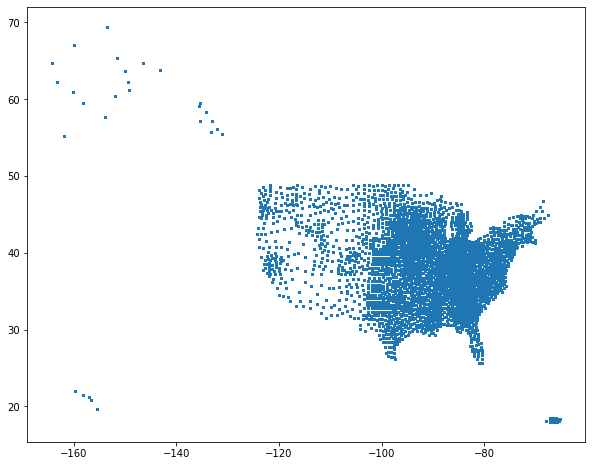

In [99]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,8))
# Get rid of an outlier
lat_lons = [(long,new_df.INTPTLAT.values[i]) for (i,long) in 
            enumerate(new_df.INTPTLONG.values) if long < 0]
lats,lons = zip(*lat_lons)
plt.scatter(lats,lons,alpha=0.1,s=2)

Hey that looks familiar!

But it's not very informative.  Ok.  A lot of covid.  Every
county in the continental U.S has Covid, and we're drawing
one point per county, so, except in Alaska, the sparsity of the points in the western
half of the US is telling us counties are bigger there.

What can we do to improve this?  Well, obviously  what we draw in a region
needs to correspond to the intensity of Covid in that region.

For ways of doing that, see the [geographical visualization notebook.](https://github.com/gawron/python-for-social-science/blob/master/visualization/visualizing_geographic_data.ipynb)

### A simple approach (no basemap)

#### Building a minimal DF containing exactly the data to be plotted

In [101]:
from matplotlib import pyplot as plt
import datetime
import numpy as np

#fig = plt.figure(figsize=(10,8))
start,end = '2020-06-01','2020-07-01'
# Get nice string name for month for title Format code %B is month name
month =  datetime.datetime.fromisoformat(start).strftime("%B")
june_df = new_df[(new_df['date']>=start)&(new_df['date']<=end)]
june_df_covid_data = june_df[['GEOID','cases', 'cases_avg_per_100k',
                              'INTPTLAT','INTPTLONG','state']]

# Build a new df containing the mean for each GEOID over the time slice.
df_to_plot = june_df_covid_data.groupby('GEOID').mean()
df_to_plot = df_to_plot[(df_to_plot['INTPTLONG'] > -130) \
                        & (df_to_plot['INTPTLONG'] < 0)]
lons,lats = df_to_plot['INTPTLONG'].values,df_to_plot['INTPTLAT'].values 

c,cper =  df_to_plot['cases'].values,df_to_plot['cases_avg_per_100k'].values

# Get rid of negs and ultra smalls
#c[c<=0.01]  = 0.01
# try a log scale
log_c = np.log((1.1+c))
# log gives better visual spread than sqrt
#sqrt_c = np.sqrt((1.1 +c))

In [102]:
df_to_plot

,cases,cases_avg_per_100k,INTPTLAT,INTPTLONG
GEOID,,,,
1001,10.709677,17.998065,32.532237,-86.646440
1003,13.322581,4.536129,30.659218,-87.746067
1005,5.129032,23.577097,31.870253,-85.405104
1007,3.193548,13.354516,33.015893,-87.127148
1009,5.032258,7.714194,33.977358,-86.566440
...,...,...,...,...
72145,1.516129,3.141613,18.455128,-66.397883
72147,0.096774,1.047419,18.125418,-65.432474
72149,0.709677,3.112903,18.130718,-66.472244


In [103]:
#df.isin({'num_wings': [0, 3]})
codes_to_plot = codes[codes['GEOID'].isin(df_to_plot.index)].set_index('GEOID')

In [104]:
np.all(codes_to_plot.index == df_to_plot.index)

True

Can use geoid to get a row.

In [105]:
codes_to_plot.loc[1007]

USPS                    AL
ANSICODE            161529
NAME           Bibb County
ALAND           1612188717
AWATER             9572303
ALAND_SQMI          622.47
AWATER_SQMI          3.696
INTPTLAT           33.0159
INTPTLONG         -87.1271
Name: 1007, dtype: object

#### buidling the name_dict (ctt,st) -> df row index

In [106]:
"""
Build dict mapping cty,state (full names) to row index in df_to_plot

To get state name we look in june_df_covid_data DF which has a state column, so

>>> june_df_covid_data[june_df_covid_data['GEOID']  == 1007]['state']
200888    Alabama
203980    Alabama
207075    Alabama
210172    Alabama
....

We just grab the first

"""
name_index_dict = dict()

for (i,geoid) in enumerate(codes_to_plot.index):
    # Grab the first state name in the column oif statenames we find for this
    # geoid in june_df_covid_data (which hasnt been aggregated over the days of the month)
    state_name = june_df_covid_data[june_df_covid_data['GEOID']  == geoid]['state'].iloc[0]
    # Keys in this dict are this county's name and state name, val is row index 
    # to find cases for this county
    name_index_dict[(codes_to_plot.loc[geoid]['NAME'], state_name)] = i
    #{(name_index.iloc[i]['NAME'],name_index.iloc[i]['USPS']): i
    #                       for i in range(len(name_index))}


Now we can go from a county,state pair to the proper row index in the covid data.

In [107]:
name_index_dict[('Cook County','Illinois')]

567

In [108]:
len(codes_to_plot),len(codes_to_plot.index)

(3098, 3098)

This code obsolete.

```
from matplotlib import pyplot as plt
import numpy as np

#fig = plt.figure(figsize=(10,8))
start,end = '2020-06-01','2020-07-01'
june_df = new_df[(new_df['date']>=start)&(new_df['date']<=end)]
# Get rid of an outliers & Alaska
lons_lats_c_cper = [(long,june_df.INTPTLAT.values[i],\
                    june_df.cases_avg.values[i],\
                    june_df.cases_avg_per_100k.values[i]) \
                   for (i,long) in \
                 enumerate(june_df.INTPTLONG.values) \
                   if (long < 0) and (long > -130)]
lons,lats,c,cper = zip(*lons_lats_c_cper)

lons,lats,c,cper = np.array(lats),np.array(lons),np.array(c),np.array(cper)

# Try a log scale
#log_cper = np.log(cper+1)
c[c>500] = 500
log_c = np.log(c+1)
```

No map.  Just plot lat/longs. Are we on target?

/Users/gawron/opt/anaconda3/envs/py385/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


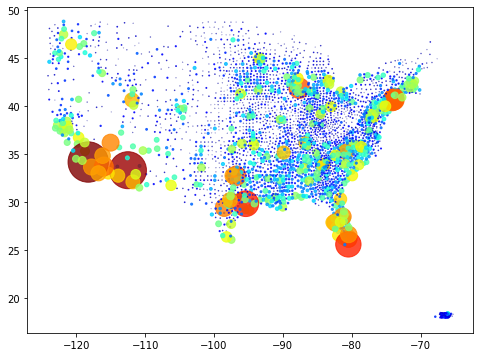

In [109]:
fig = plt.figure(figsize=(8,6))
# Get rid of an outlier
#lat_lons = [(long,new_df.INTPTLAT.values[i]) for (i,long) in 
#            enumerate(new_df.INTPTLONG.values) if long < 0]
#lats,lons = zip(*lat_lons)
plt.scatter(lons,lats,
            s=c, label="Covid cases",
            c=log_c, cmap=plt.get_cmap("jet"),
            #colorbar=True, 
            alpha=0.8)

### UsingBasemap

See [Van der Plas's Chapter on using Basemap.](https://(jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html)

We'll use basemap,choose a project, draw in state and cty boundaries,
plop approipriately color dots in the middle of the cty using our
lat long info.

For US county shapefiles you can use in Basemap, visit [here.]( https://www.census.gov/cgi-bin/geo/shapefiles/index.php)

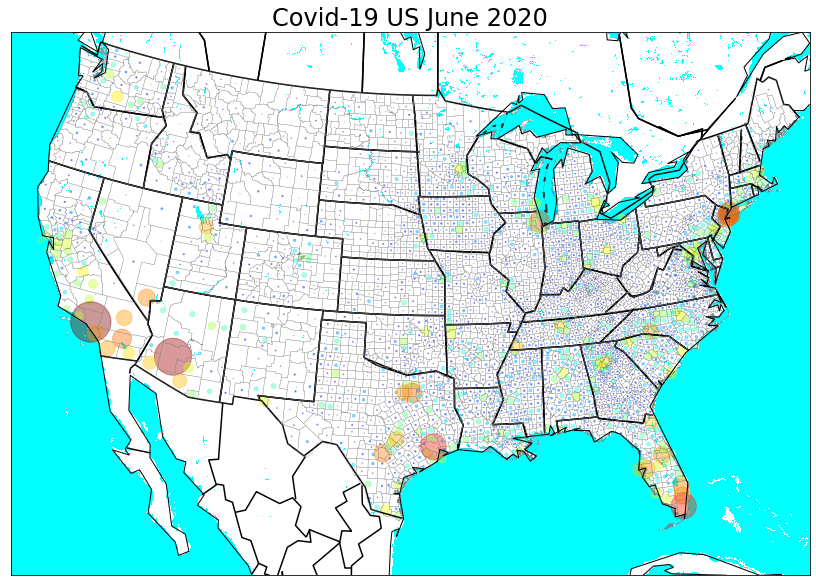

In [110]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import os.path
python_for_ss_nb_dir = '/Users/gawron/Desktop/src/sphinx/python_for_ss/'\
                     'colab_notebooks/python-for-social-science/'
shapefile_dir = os.path.join(python_for_ss_nb_dir, 'visualization/data/admin_areas')
# California
#llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat=(-124.5,32.45,-113.50,50.0)
llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat=(-124.5,21.45,-60,50)
#HEIGHT/WIDTH
aspect = (urcrnrlat-llcrnrlat)/(urcrnrlon-llcrnrlon)
# Use this number for scaling the figure.  You want to keep the aspect constant
fig_width = 10
fig = plt.figure(figsize=(fig_width/aspect,fig_width))
ax = plt.subplot(111)
# Lambert Conformal map of lower 48 states.
map = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
#map.drawmapboundary(fill_color='aqua')
#map.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
#map.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
#map.fillcontinents(color='coral',lake_color='aqua')
cmap = plt.get_cmap("jet")
map.scatter(lons,lats,
            s=c,#s=cper, 
            label="Covid cases",
            c=log_c, 
            cmap=cmap,
            #colorbar=True, 
            alpha=0.4,latlon=True)
map.drawlsmask(land_color='white',ocean_color='aqua',
               lakes=True,resolution='f', grid=1.25)
countyborderwidth,stateborderwidth = (.25,1.5)
map.drawstates(linewidth=stateborderwidth)
map.drawcountries(linewidth=stateborderwidth)
##  Draw the counties this way (Could use map.drawcounties())
##  But this way paves the way for the next stage.
shape_info = map.readshapefile(os.path.join(shapefile_dir,'USA_adm2'),
                               'counties',
                               drawbounds=True,
                               linewidth=countyborderwidth,
                               color='gray')
map.drawcoastlines()
plt.title(f'Covid-19 US {month} 2020',fontsize=24)
plt.show()

Note: The work on NYC has paid off.  It is showing up as a hot spot.

### Coloring county polygons

The problem with the map above from a visualization point of view is that it's hard
tp look at because we're placing small dots in some very large counties.  There
are many fairly large counties, and as a result the map is mostly white.

But we have county wide statistics.  The coloring we apply to the county should
apply equally to every pixel in the county.  Ideally, what we want is to
color the entire county area with whatever color correctly represents its Covid
status.

This gets us into shapefiles and polygons. When counties are drawn on a map
this is done by uploading a shape file that defines a sequence of lines
on the map that trace the outline of each county in the U.S.  What we
want is to fill each of these polygons with the appropriate color. So
the call to map.scatter in the code above will be replaced with
a loop that calls `add_color_patch(ax, i, color_idx)`   for
each county (it's a little worse than that because some counties
take more than one polygon to draw, but that's the idea, basically).

The code below is inspired by [this Guthub example code, fill_states.py, ](https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py) 
which uses  Basecamp and shapefiles to represent population
density info.


In [111]:
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

cmap = plt.get_cmap("jet")
vmin = log_c.min()
vmax = log_c.max()
norm = Normalize(vmin=vmin, vmax=vmax)

def add_color_patch(ax, cases, i, color_idx):
    color_val =  cmap(np.sqrt((cases[color_idx]-vmin)/(vmax-vmin)))[:3] 
    seg = map.counties[i]
    color = rgb2hex(color_val)
    poly = Polygon(seg,facecolor=color,edgecolor=color)
    ax.add_patch(poly)

def delete_spaces(wd):
    res = [wd[0]]
    for let in wd[1:]:
        if ' ' == let:
            #res.append(f' {let}')
            continue
        else:
            res.append(let)
    return ''.join(res)

def make_city_state_pair (cty_stem, state, info_dict):
    return (f"{cty_stem} {info_dict['TYPE_2']}", state)

def  make_replacement(cty_stem):
    return cty_stem.replace('Saint','St.')


def make_info_idx2color_idx (map):
    global omitted_counties
    """
    Must be done after reading in shapefile for counties, so
    that map.counties_info exists.
    
    Athe moment this is quite horrible because of small naming mismatches
    between the codes info for counties and the shapefile info
    for counties.
    """
    omitted_states = {'Alaska','Hawaii','Puerto Rico'}
    # In map.counties_info but we cdnt find them in name_index_dict
    omitted_counties = []
    info_idx2color_idx = dict()
    for (i,info_dict) in enumerate(map.counties_info):
        #map full cty name ('NAME_2' + TYPE_2 ) and full state name (NAME_1) to array idx
        cty_stem, state = info_dict['NAME_2'],info_dict['NAME_1'] 
        if state in omitted_states:
            continue
        cty_st = make_city_state_pair (cty_stem, state, info_dict)
        #(f"{cty_stem} {info_dict['TYPE_2']}", info_dict['NAME_1'])
        try:
            color_idx = name_index_dict[cty_st]
        except KeyError as e1:
            cty_st = make_city_state_pair (delete_spaces(cty_stem), state, info_dict)
            try:
                color_idx = name_index_dict[cty_st] 
            except KeyError as e2:
                cty_st = make_city_state_pair (make_replacement(cty_stem), state, info_dict)
                try:
                    color_idx = name_index_dict[cty_st]
                except:
                    omitted_counties.append((cty_stem, state))
                    continue
        info_idx2color_idx[i] = color_idx
    return info_idx2color_idx
    #print(cty_st[0], cty_st[1], color_idx)

#info_idx2color_idx = make_info_idx2color_idx (map)
#add_color_patch(i, color_idx)
#map.counties_info[0]

After reading county shapefiles:

`map.counties[0]` is the polygon (seq of lat/long pairs) for
`map.counties_info[0]`. It is a sequence of a 142 lat long pairs
defining a **polygon** on the map. 

In [23]:
len(map.counties[0]),map.counties[0][0]

(142, (3365495.1658067433, 1090342.5172590325))

 What polygon?

In [122]:
map.counties_info[1]

{'ID_0': 244,
 'ISO': 'USA',
 'NAME_0': 'United States',
 'ID_1': 1,
 'NAME_1': 'Alabama',
 'ID_2': 2,
 'NAME_2': 'Baldwin',
 'TYPE_2': 'County',
 'ENGTYPE_2': 'County',
 'NL_NAME_2': '',
 'VARNAME_2': '',
 'RINGNUM': 1,
 'SHAPENUM': 2}

The same county can reuqire more than one sequence to draw.

In [123]:
map.counties_info[2]

{'ID_0': 244,
 'ISO': 'USA',
 'NAME_0': 'United States',
 'ID_1': 1,
 'NAME_1': 'Alabama',
 'ID_2': 2,
 'NAME_2': 'Baldwin',
 'TYPE_2': 'County',
 'ENGTYPE_2': 'County',
 'NL_NAME_2': '',
 'VARNAME_2': '',
 'RINGNUM': 2,
 'SHAPENUM': 2}

Changes:

1.  Calling add_color_patch for each shape in map.counties_info.
2.  All the Covid case info for a county is being represented in 
    the color value.  So no need to make any decision about point size
    as in the previous version, where a colored dot at the cty center 
    represented the Covid case info.

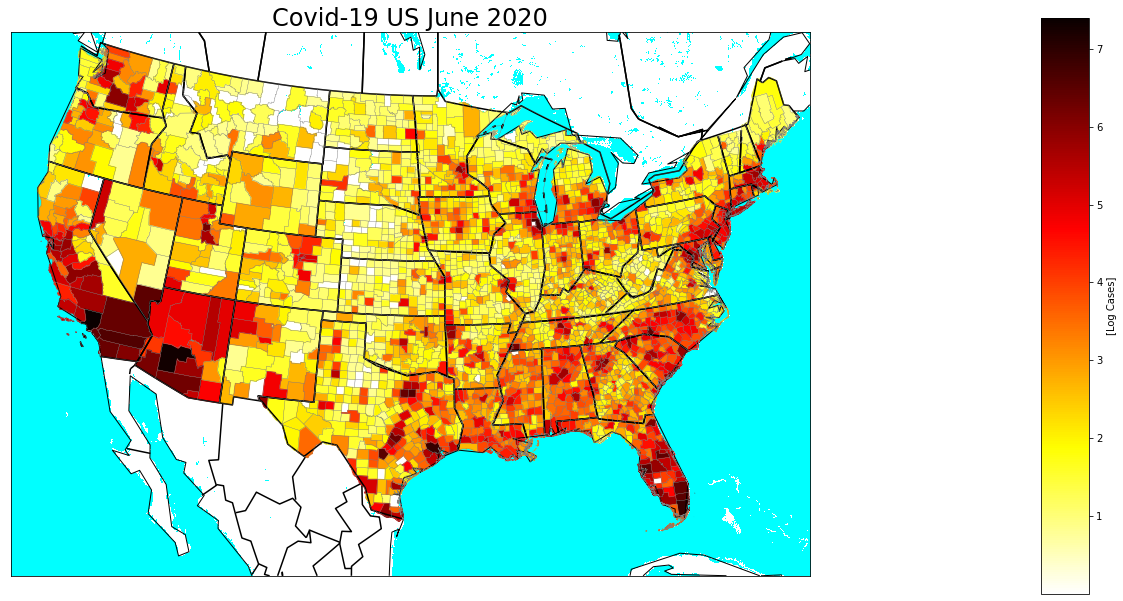

In [112]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import os.path
python_for_ss_nb_dir = '/Users/gawron/Desktop/src/sphinx/python_for_ss/'\
                     'colab_notebooks/python-for-social-science/'
shapefile_dir = os.path.join(python_for_ss_nb_dir, 'visualization/data/admin_areas')
#llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat=(-124.5,32.45,-113.50,50.0)
llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat=(-124.5,21.45,-60,50)
#HEIGHT/WIDTH
aspect = (urcrnrlat-llcrnrlat)/(urcrnrlon-llcrnrlon)
# Use this number for scaling the figure.  You want to keep the aspect constant
fig_width = 10
fig = plt.figure(figsize=(fig_width/aspect,fig_width))
ax = plt.subplot(111)
plt.title(f'Covid-19 US {month} 2020',fontsize=24)
# Lambert Conformal map of lower 48 states.
map = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

map.drawlsmask(land_color='white',ocean_color='aqua',
               lakes=True,resolution='f', grid=1.25)
countyborderwidth,stateborderwidth = (.25,1.5)
map.drawstates(linewidth=stateborderwidth)
map.drawcountries(linewidth=stateborderwidth)
map.drawcoastlines()
############################################
##  New stuff
##  cmap = plt.get_cmap("jet")
# This color map tells the story better
cmap = plt.cm.hot_r
shape_info = map.readshapefile(os.path.join(shapefile_dir,'USA_adm2'),
                               'counties',
                               drawbounds=True,
                               linewidth=countyborderwidth,
                               color='gray')
# we want a map from the index in the shapfile info
# to the index in the covid cases array
info_idx2color_idx = make_info_idx2color_idx (map)
# log_c is the covid cases array containing  the case info
for (i,color_idx) in info_idx2color_idx.items():
    add_color_patch(ax, log_c, i, color_idx)
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c, cmap=cmap, norm=norm, orientation='vertical',
                  label=r'[Log Cases]')
plt.show()

In [186]:
len(info_idx2color_idx)

7590

In [187]:
len(map.counties_info)

12284

Among the more troublesome of the omitted counties are the constituents of NYC: Bronx County, Queens County, Richmond County, Kings County (= Brooklyn), New York (= Manhattan).

In [182]:
{(cty,st) for  (cty,st) in omitted_counties if st == 'New York'}

{('Bronx', 'New York'),
 ('Kings', 'New York'),
 ('Lake Ontario', 'New York'),
 ('New York', 'New York'),
 ('Queens', 'New York'),
 ('Richmond', 'New York')}